# Exploring the Discrete Wavelet Transform

In [2]:
import sounddevice as sd
import pywt
import math
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pylab

## Select the number of samples to transform

In [3]:
N = 512

## Select the number of levels of the DWT

In [4]:
levels = 4

## Select the transform filters

In [5]:
wavelet_name = "haar"
#wavelet_name = "db5"
#wavelet_name = "db20"
#wavelet_name = "bior2.2"
#wavelet_name = "rbio2.2"
wavelet = pywt.Wavelet(wavelet_name)

## Let's compute basis functions of the inverse DWT
Inverse transform of a unit impulse. The frequency response is also shown.

In [6]:
def energy_of_signal(x):
    return np.sum(x.astype(np.double)*x.astype(np.double))

In [7]:
def spectrum(i):
    zeros = np.zeros(N)
    decomposition = pywt.wavedec(zeros, wavelet=wavelet, level=levels, mode="per")
    coefficients, slices = pywt.coeffs_to_array(decomposition)
    coefficients[i] = 1
    decomposition = pywt.array_to_coeffs(coefficients, slices, output_format="wavedec")
    samples = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
    coefs = np.fft.rfft(samples)
    spectrum = np.sqrt(coefs.real*coefs.real + coefs.imag*coefs.imag)
    pylab.plot(np.linspace(0, len(spectrum)-1, len(spectrum)), spectrum)
    energy = energy_of_signal(samples)
    if i <= (N>>levels):
        type = "scaling f."
    else:
        type = "wavelet f."
    pylab.plot(np.linspace(0, len(samples)-1, len(samples)), samples, label=f"{i} ({energy:3.2f}) {type}")
    pylab.legend(loc='upper right')
    pylab.show()

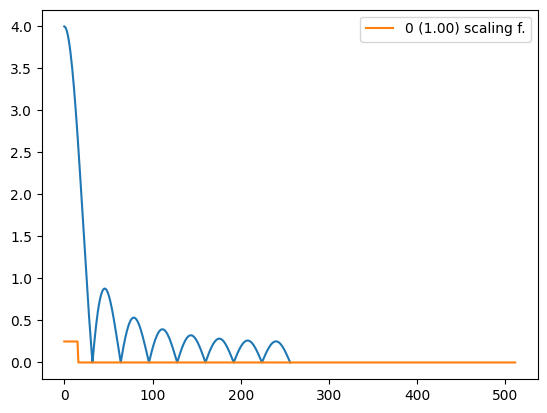

interactive(children=(IntSlider(value=0, description='i', max=511), Output()), _dom_classes=('widget-interact'…

In [8]:
interact(spectrum, i=widgets.IntSlider(min=0, max=N-1, step=1, value=0));

## Testing orthogonality of the (synthesis) basis

In [9]:
def get_basis(i):
    zeros = np.zeros(N)
    decomposition = pywt.wavedec(zeros, wavelet=wavelet, level=levels, mode="per")
    coefficients, slices = pywt.coeffs_to_array(decomposition)
    coefficients[i] = 1
    decomposition = pywt.array_to_coeffs(coefficients, slices, output_format="wavedec")
    samples = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
    return samples

print("Inner product between different basis fuctions")
for i in range(N):
    print(np.inner(get_basis(i), get_basis((i+1)%N)))
    
print("Inner product between the same basis fuction")
for i in range(N):
    print(np.inner(get_basis(i), get_basis(i)))

Inner product between different basis fuctions
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

## Take an audio sequence

In [10]:
def plot(x, y, xlabel='', ylabel='', title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.grid()
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_text(ylabel)
    ax.plot(x, y, '.', markersize=1)
    plt.show(block=False)

In [11]:
fs = 44100
duration = 80000/44100  # seconds
x = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype=np.int16)
print("Say something!")
while sd.wait():
    pass
print("done")
x = x.flatten()

Say something!
done


## DWT(levels=1)

In [12]:
decomposition_1 = pywt.wavedec(x, wavelet=wavelet, level=1, mode="per")
coefficients_1, slices = pywt.coeffs_to_array(decomposition_1)

## DWT(levels=2)

In [13]:
decomposition_2 = pywt.wavedec(x, wavelet=wavelet, level=2, mode="per")
coefficients_2, slices = pywt.coeffs_to_array(decomposition_2)

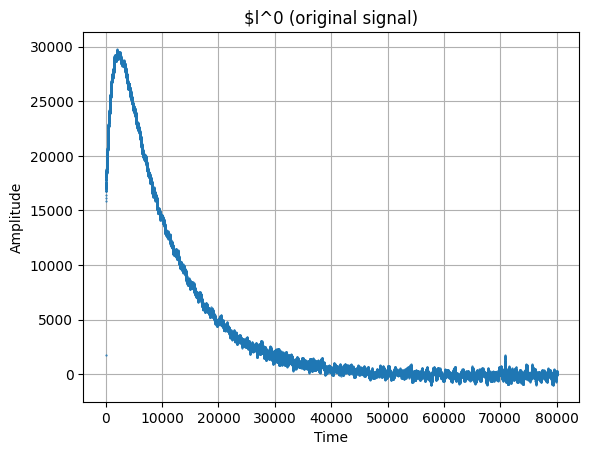

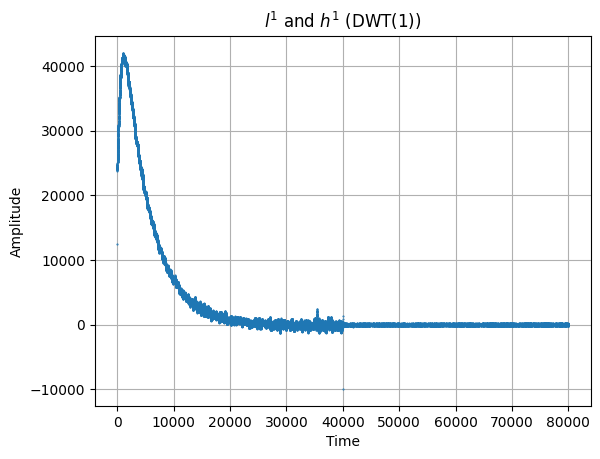

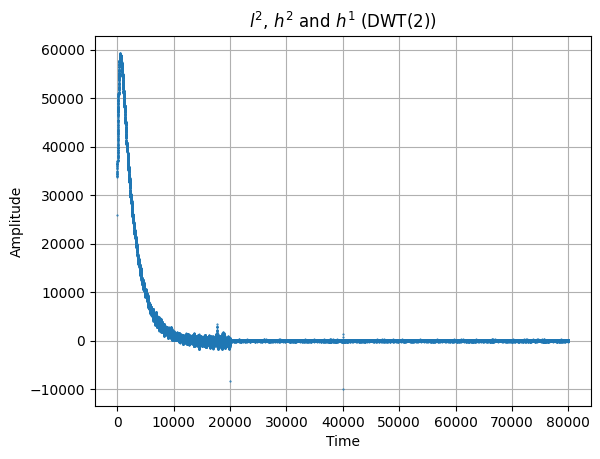

In [14]:
plot(np.linspace(0, len(x)-1, len(x)), x, "Time", "Amplitude", "$l^0 (original signal)")
plot(np.linspace(0, len(coefficients_1)-1, len(coefficients_1)), coefficients_1, "Time", "Amplitude", "$l^1$ and $h^1$ (DWT(1))")
plot(np.linspace(0, len(coefficients_2)-1, len(coefficients_2)), coefficients_2, "Time", "Amplitude", "$l^2$, $h^2$ and $h^1$ (DWT(2))")

## Ignore the rest ...

Scaling function

In [15]:
zeros = np.zeros(N)
decomposition = pywt.wavedec(zeros, wavelet=wavelet, level=5, mode="per")
coefficients, slices = pywt.coeffs_to_array(decomposition)
#coefficients = signal.unit_impulse(1024)
coefficients[0] = N
decomposition = pywt.array_to_coeffs(coefficients, slices, output_format="wavedec")
samples = pywt.waverec(decomposition, wavelet=wavelet, mode="per")

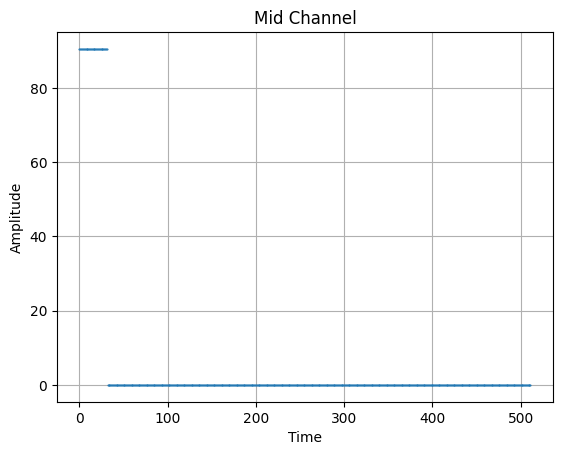

In [16]:
plot(np.linspace(0, len(samples)-1, len(samples)), samples, "Time", "Amplitude", "Mid Channel")


Wavelet function

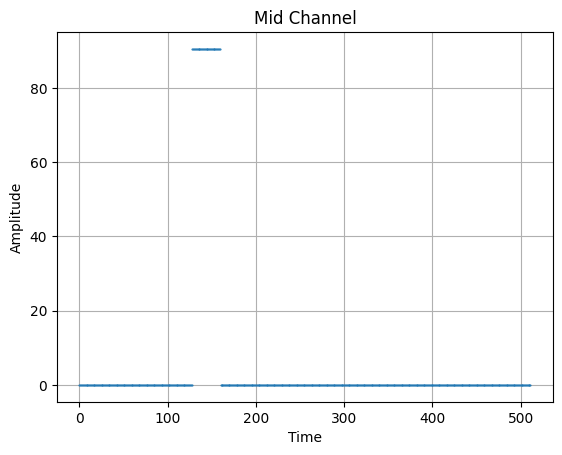

In [17]:
zeros = np.zeros(N)
decomposition = pywt.wavedec(zeros, wavelet=wavelet, level=5, mode="per")
coefficients, slices = pywt.coeffs_to_array(decomposition)
#coefficients = signal.unit_impulse(1024)
coefficients[4] = N
decomposition = pywt.array_to_coeffs(coefficients, slices, output_format="wavedec")
samples = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
plot(np.linspace(0, len(samples)-1, len(samples)), samples, "Time", "Amplitude", "Mid Channel")


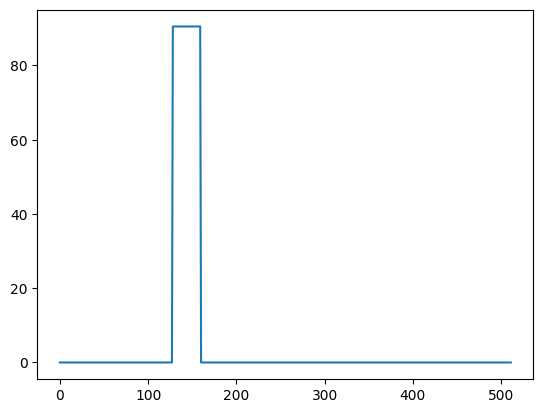

In [18]:
import pylab
pylab.plot(np.linspace(0, len(samples)-1, len(samples)), samples)
pylab.show()

In [19]:
[phi, psi, x] = pywt.Wavelet('db5').wavefun(level=4)

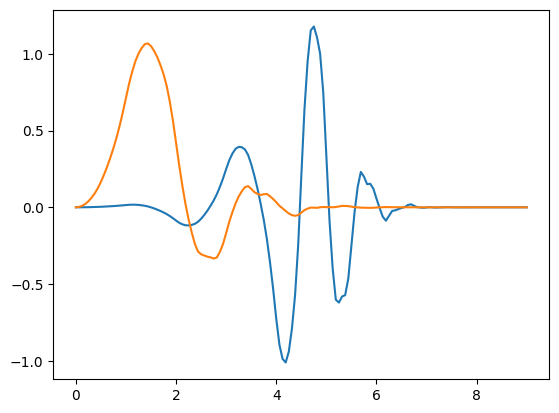

In [20]:
pylab.plot(x, psi)
pylab.plot(x, phi)
pylab.show()

In [21]:
[a_scaling, a_wavelet, s_scaling, s_wavelet, x] = pywt.Wavelet('bior2.2').wavefun(level=4)

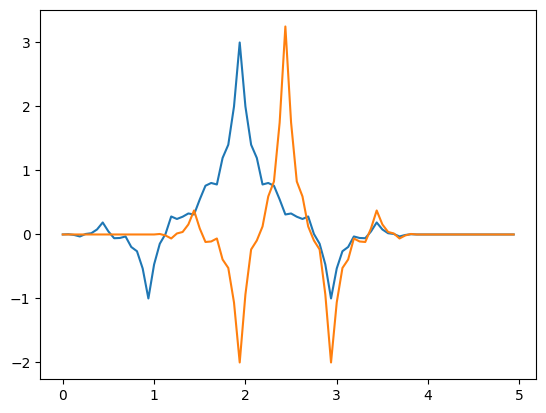

In [22]:
pylab.plot(x, a_scaling)
pylab.plot(x, a_wavelet)
pylab.show()

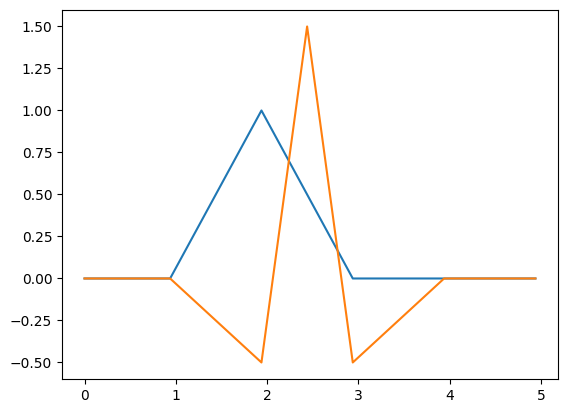

In [23]:
pylab.plot(x, s_scaling)
pylab.plot(x, s_wavelet)
pylab.show()

In [24]:
[a_scaling, a_wavelet, s_scaling, s_wavelet, x] = pywt.Wavelet('rbio2.2').wavefun(level=4)

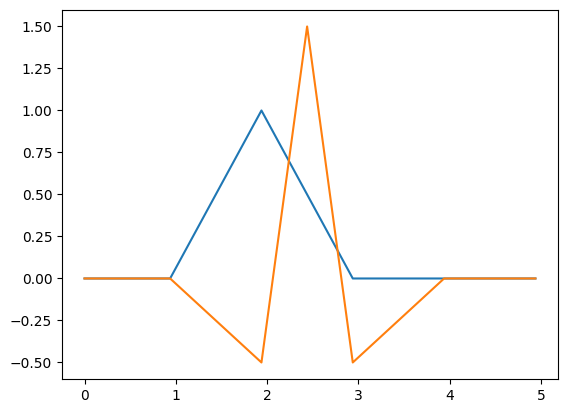

In [25]:
pylab.plot(x, a_scaling)
pylab.plot(x, a_wavelet)
pylab.show()

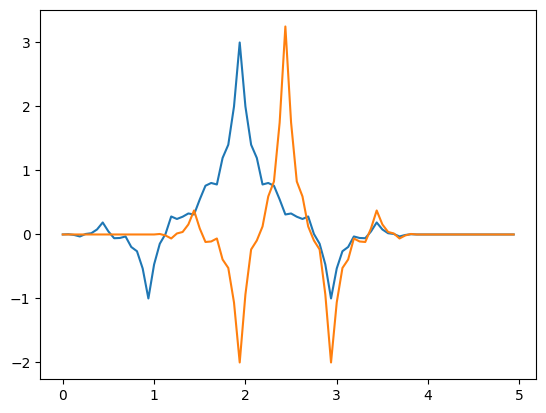

In [26]:
pylab.plot(x, s_scaling)
pylab.plot(x, s_wavelet)
pylab.show()

In [27]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [28]:
def f(i):
    zeros = np.zeros(N)
    decomposition = pywt.wavedec(zeros, wavelet=wavelet, level=4, mode="per")
    coefficients, slices = pywt.coeffs_to_array(decomposition)
    coefficients[i] = 1
    decomposition = pywt.array_to_coeffs(coefficients, slices, output_format="wavedec")
    samples = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
    pylab.plot(np.linspace(0, len(samples)-1, len(samples)), samples, label=f"{i}")
    pylab.legend(loc='upper right')
    pylab.show()

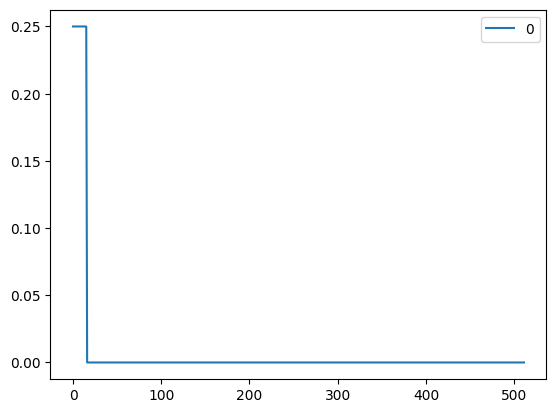

interactive(children=(IntSlider(value=0, description='i', max=511), Output()), _dom_classes=('widget-interact'…

In [29]:
interact(f, i=widgets.IntSlider(min=0, max=N-1, step=1, value=0));